In [1]:
### Import libraries and data
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
from sklearn import metrics

Mounted at /content/gdrive


In [2]:
# The dataset can be found on Kaggle at the link https://www.kaggle.com/johnjdavisiv/urinary-biomarkers-for-pancreatic-cancer
df_info = pd.read_csv('/content/gdrive/MyDrive/Machine_learning/Debernardi et al 2020 documentation.csv')
df = pd.read_csv('/content/gdrive/MyDrive/Machine_learning/Debernardi et al 2020 data.csv')

In [3]:
df.shape

(590, 14)

In [4]:
df_info

,Column name,Original column name,Details
0,sample_id,Sample ID,Unique string identifying each subject
1,patient_cohort,Patient's Cohort,"Cohort 1, previously used samples; Cohort 2, ..."
2,sample_origin,Sample Origin,"BPTB: Barts Pancreas Tissue Bank, London, UK; ..."
3,age,Age,Age in years
4,sex,Sex,"M = male, F = female"
5,diagnosis,"Diagnosis (1=Control, 2=Benign, 3=PDAC)","1 = control (no pancreatic disease), 2 = benig..."
6,stage,Stage,"For those with pancratic cancer, what stage wa..."
7,benign_sample_diagnosis,Benign Samples Diagnosis,"For those with a benign, non-cancerous diagnos..."
8,plasma_CA19_9,Plasma CA19-9 U/ml,Blood plasma levels of CA 19–9 monoclonal anti...
9,creatinine,Creatinine mg/ml,Urinary biomarker of kidney function


In [5]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


# Data Cleaning

In [6]:
df.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [7]:
df = df.drop(columns=['stage', 'benign_sample_diagnosis', 'plasma_CA19_9', 'REG1A'])

In [8]:
df.isnull().sum()

sample_id         0
patient_cohort    0
sample_origin     0
age               0
sex               0
diagnosis         0
creatinine        0
LYVE1             0
REG1B             0
TFF1              0
dtype: int64

In [9]:
# convert sample id into numerical, as it contains the letter S at the beginning of each sample, the easiest way to solve the problem is to remove it
## remaining in the end with only numerical values. The final-touch is done using the pandas function "to_numerical"
df['sample_id'] = df['sample_id'].str.replace('S', '')
df['sample_id'] = pd.to_numeric(df['sample_id'])

In [10]:
## similar to what have been done for sample_id
df['patient_cohort'] = df['patient_cohort'].str.replace('Cohort', '')
df['patient_cohort'] = pd.to_numeric(df['patient_cohort'])

In [11]:
### encoding manually the 4 variables in sample_origin
df.sample_origin.unique()
df['sample_origin'] = df['sample_origin'].str.replace('BPTB', '0')
df['sample_origin'] = df['sample_origin'].str.replace('LIV', '1')
df['sample_origin'] = df['sample_origin'].str.replace('ESP', '2')
df['sample_origin'] = df['sample_origin'].str.replace('UCL', '3')
df['sample_origin'] = pd.to_numeric(df['sample_origin'])

In [12]:
# encode sex as F = 0 and M = 1
df['sex'] = df['sex'].str.replace('F', '0')
df['sex'] = df['sex'].str.replace('M', '1')
df['sex'] = pd.to_numeric(df['sex'])

In [13]:
df['diagnosis'] = df['diagnosis'].astype(str)
df['diagnosis'] = df['diagnosis'].str.replace('1', '0')
df['diagnosis'] = df['diagnosis'].str.replace('2', '1')
df['diagnosis'] = df['diagnosis'].str.replace('3', '2')

In [14]:
df['cancer'] = df['diagnosis'].apply(lambda x: 1 if x=='2' else 0)
df['cancer'] = pd.to_numeric(df['cancer'])
df['diagnosis'] = pd.to_numeric(df['diagnosis'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sample_id       590 non-null    int64  
 1   patient_cohort  590 non-null    int64  
 2   sample_origin   590 non-null    int64  
 3   age             590 non-null    int64  
 4   sex             590 non-null    int64  
 5   diagnosis       590 non-null    int64  
 6   creatinine      590 non-null    float64
 7   LYVE1           590 non-null    float64
 8   REG1B           590 non-null    float64
 9   TFF1            590 non-null    float64
 10  cancer          590 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 50.8 KB


In [16]:
df.cancer.unique()

array([0, 1])

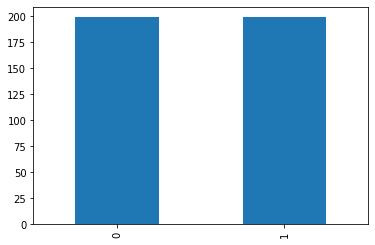

In [17]:
cancer_count = len(df[df['cancer'] == 1])
non_cancer_count = len(df[df['cancer'] == 0])

sampled_non_cancer = df[df['cancer'] == 0].sample(n=cancer_count)
cancer = df[df['cancer'] == 1]

sampled_non_cancer.reset_index(drop=True, inplace=True)
cancer.reset_index(drop=True, inplace=True)

balanced_df = pd.concat([sampled_non_cancer, cancer]).reset_index(drop=True);

balanced_df['cancer'].value_counts().plot(kind='bar')

# Data Exploration

In [18]:
corr = balanced_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,creatinine,LYVE1,REG1B,TFF1,cancer
sample_id,1.00,-0.17,0.28,0.33,0.15,0.94,0.05,0.43,0.37,0.33,0.86
patient_cohort,-0.17,1.00,-0.47,-0.14,-0.23,-0.35,-0.20,-0.37,-0.13,-0.17,-0.38
sample_origin,0.28,-0.47,1.00,0.14,0.13,0.35,0.11,0.32,0.15,0.19,0.25
age,0.33,-0.14,0.14,1.00,0.03,0.37,-0.07,0.37,0.20,0.20,0.43
sex,0.15,-0.23,0.13,0.03,1.00,0.19,0.16,0.17,0.16,0.07,0.17
diagnosis,0.94,-0.35,0.35,0.37,0.19,1.00,0.07,0.51,0.37,0.37,0.90
creatinine,0.05,-0.20,0.11,-0.07,0.16,0.07,1.00,0.32,0.29,0.40,0.08
LYVE1,0.43,-0.37,0.32,0.37,0.17,0.51,0.32,1.00,0.53,0.57,0.54
REG1B,0.37,-0.13,0.15,0.20,0.16,0.37,0.29,0.53,1.00,0.70,0.40
TFF1,0.33,-0.17,0.19,0.20,0.07,0.37,0.40,0.57,0.70,1.00,0.38


The target variable in this study is diagnosis as it will indicate in which of the 3 stages the disease is.
The task to be solved is a classification and the model used is going to be a supervised one.

- The variables with higher correlation are LYVE1,	REG1B,	TFF1 and sample_origin. For this case only the urinary markers will be selected 

In [19]:
X = balanced_df[['LYVE1', 'REG1B', 'TFF1']]
y = balanced_df['cancer']


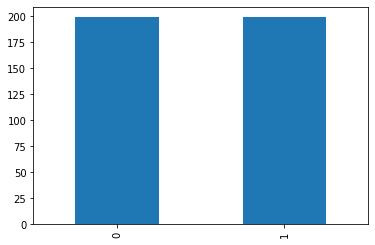

In [20]:
y.value_counts().plot(kind='bar')

Target variables are balanced 

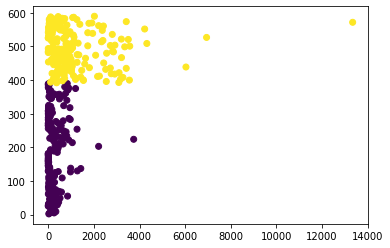

In [21]:
plt.figure()
plt.scatter(balanced_df['TFF1'],balanced_df['sample_id'], c=y)

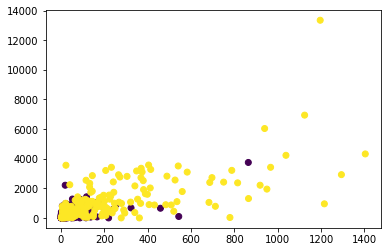

In [22]:
plt.figure()
plt.scatter(balanced_df['REG1B'],balanced_df['TFF1'], c=y)

# Split data in Train and test and normalize it


In [23]:
sc = StandardScaler()
X = X.to_numpy()
y = y.to_numpy()
sc.fit(X)

StandardScaler()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=42)
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (318, 3)
X_test shape:  (80, 3)
y_train shape:  (318,)
y_test shape:  (80,)


In [25]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [26]:
Lreg = LogisticRegression()
Lreg.fit(X_train, y_train)
y_hat = Lreg.predict(X_test)
accuracy(y_test, y_hat)

0.7625

In [27]:
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        40
           1       0.77      0.75      0.76        40

    accuracy                           0.76        80
   macro avg       0.76      0.76      0.76        80
weighted avg       0.76      0.76      0.76        80



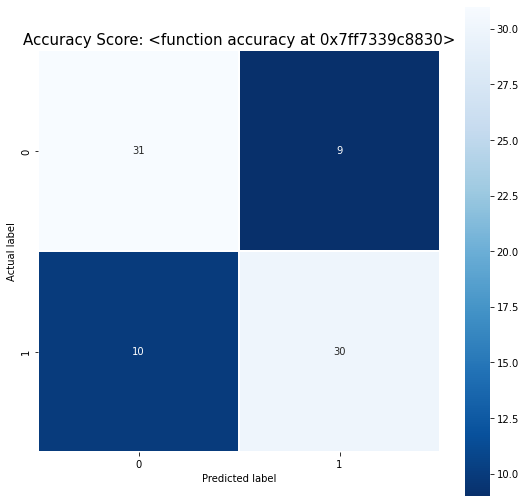

In [28]:
cm = metrics.confusion_matrix(y_test, y_hat)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [29]:
class KNNClassifier():
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X, K, epsilon=1e-4):
        N = len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2 = np.sum((self.X-X[i])**2, axis=1)
            self.idxt = np.argsort(dist2)[:K] 
            gamma_k = 1/(np.sqrt(dist2[self.idxt]+epsilon)) 
            y_hat[i] = np.bincount(self.y[self.idxt], weights=gamma_k).argmax()  ### 
            
        return y_hat

In [30]:
Knn = KNNClassifier()
Knn.fit(X_train, y_train)
y_hat = Knn.predict(X_test, 50, epsilon=1e-2)
accuracy(y_test, y_hat)

0.775

In [31]:
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        40
           1       0.82      0.70      0.76        40

    accuracy                           0.78        80
   macro avg       0.78      0.77      0.77        80
weighted avg       0.78      0.78      0.77        80



Text(0.5, 1.0, 'Accuracy Score: <function accuracy at 0x7ff7339c8830>')

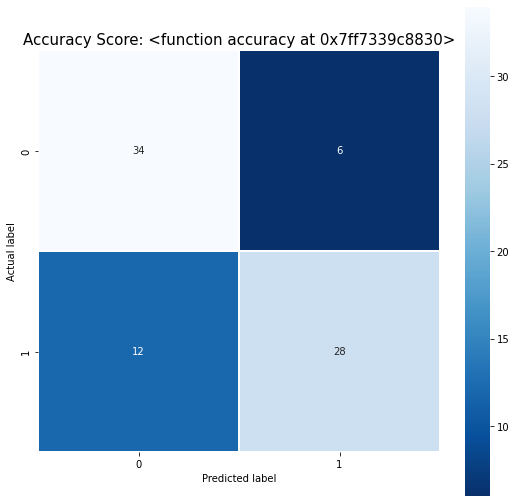

In [32]:
cm = metrics.confusion_matrix(y_test, y_hat)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)

The knn regressor did better in predicting a malign cancer 


In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=1)

dt = dt.fit(X_train,y_train)

y_hat = dt.predict(X_test)

In [34]:
accuracy(y_test, y_hat)

0.6875

In [35]:
print(metrics.classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        40
           1       0.69      0.68      0.68        40

    accuracy                           0.69        80
   macro avg       0.69      0.69      0.69        80
weighted avg       0.69      0.69      0.69        80



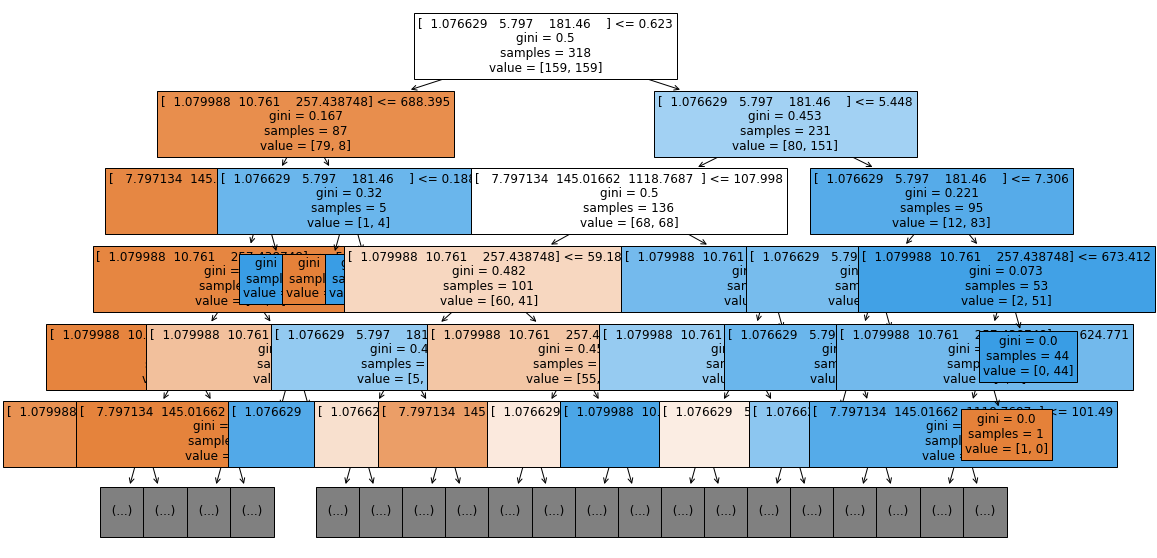

In [36]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(17,10))
tree = plot_tree(dt, max_depth=5, feature_names=list(X_train), filled=True, fontsize=12)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 64)             320       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 64)             16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 64)             16448     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 64)            0

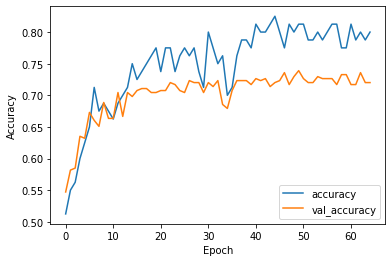

In [37]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

model = models.Sequential()
model.add(layers.Conv1D(64, 4, padding = 'SAME', activation='relu', input_shape=(3,1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(64, 4, padding = 'SAME', activation='relu'))
model.add(layers.MaxPooling1D(1))
model.add(layers.Conv1D(64, 4, padding = 'SAME', activation='relu'))
model.add(layers.MaxPooling1D(1))
model.add(layers.Conv1D(32, 4, padding = 'SAME', activation='relu'))
model.add(layers.MaxPooling1D(1))
model.add(layers.Conv1D(16, 4, padding = 'SAME', activation='relu'))
model.add(layers.Flatten())


model.add(layers.Dense(1, activation='sigmoid'))


# as metric we choose the accuracy: the total number of correct predictions made
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()


# Training
history = model.fit(X_test, y_test, epochs=65, batch_size=8, 
                    validation_data=(X_train, y_train))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


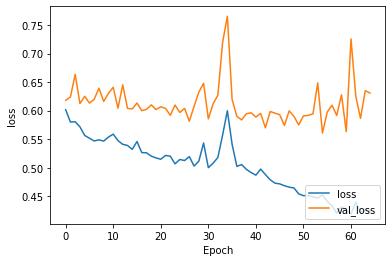

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

Epoch 1/25
10/10 [==============================] - 0s 13ms/step - loss: 0.4187 - accuracy: 0.8000 - val_loss: 0.5700 - val_accuracy: 0.7358
Epoch 2/25
10/10 [==============================] - 0s 11ms/step - loss: 0.4506 - accuracy: 0.7875 - val_loss: 0.7134 - val_accuracy: 0.7264
Epoch 3/25
10/10 [==============================] - 0s 10ms/step - loss: 0.4357 - accuracy: 0.7750 - val_loss: 0.6419 - val_accuracy: 0.7264
Epoch 4/25
10/10 [==============================] - 0s 10ms/step - loss: 0.4162 - accuracy: 0.7750 - val_loss: 0.6131 - val_accuracy: 0.7390
Epoch 5/25
10/10 [==============================] - 0s 12ms/step - loss: 0.4100 - accuracy: 0.8000 - val_loss: 0.6166 - val_accuracy: 0.7390
Epoch 6/25
10/10 [==============================] - 0s 11ms/step - loss: 0.4005 - accuracy: 0.8125 - val_loss: 0.6057 - val_accuracy: 0.7421
Epoch 7/25
10/10 [==============================] - 0s 11ms/step - loss: 0.3953 - accuracy: 0.7875 - val_loss: 0.6126 - val_accuracy: 0.7390
Epoch 8/25
10

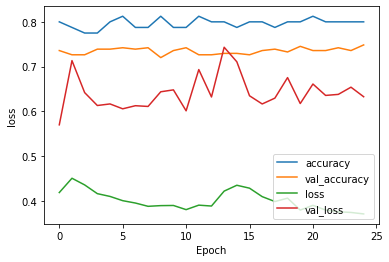

In [39]:
history = model.fit(X_test, y_test, epochs=25
                    , batch_size=8, 
                    validation_data=(X_train, y_train))

# Validation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')